In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from calculator import Methods,Calculator
from const import Const
from test1 import Test

In [2]:
cal=Calculator()
cal.read_excel('../Data/无磁场/Data-M_c=8.xlsx','Data-M_c=8')
te=Test(0.3,8)

In [10]:
filename='store-all.csv'
f=open(filename,'r')
values=[]
for line in f:
    values.append(line.split(','))
g_in=float(values[1][-1])
f.close()

"""filename='../Data/store-3.3e+3.csv'
f=open(filename,'r')
values=[]
for line in f:
    values.append(line.split(','))
f.close()"""

"filename='../Data/store-3.3e+3.csv'\nf=open(filename,'r')\nvalues=[]\nfor line in f:\n    values.append(line.split(','))\nf.close()"

In [4]:
g_in

67.43520380021779

In [5]:
import matplotlib.pyplot as plt

In [11]:
order=23
maxtime=30
m=cal.M_p[order]
L_s=cal.L_init[order]
ST=cal.ST[order]
te.con.set_M_p(m,2e+8)
x_start=-1e+6
x_step1,x_step2=0.5e+2,0.1e+2
error=1e-4
y_start=te.cal_ML_simple_B(ST,L_s,True,0.0,x_start)[-1]/(te.r[-1]*te.con.R_B)
y_target=g_in
y1=y_start
x1=x_start
i=1
while abs(y1-y_target)>error:
    if i>1:
        x2=x1+x_step2
    else:
        x2=x1+x_step1
    y2=te.cal_ML_simple_B(ST,L_s,True,0.0,x2)[-1]/(te.r[-1]*te.con.R_B)
    grad=(y2-y1)/(x2-x1)
    x1=(y_target-y2)/grad+x2 
    y1=te.cal_ML_simple_B(ST,L_s,True,0.0,x1)[-1]/(te.r[-1]*te.con.R_B)
    i+=1
    if i>maxtime:
        print('1 come out.')
        break
print(x1,y1)
dgr=x1
x_start=ST 
x_step=ST/40
error=1e-5
y_start=te.cal_ML_simple_B(x_start,L_s,True,0.0,dgr)[-2]
y_target=0.0
y1=y_start
x1=x_start
i=0
while abs(y1-y_target)>error:
    x2=x1+x_step
    y2=te.cal_ML_simple_B(x2,L_s,True,0.0,dgr)[-2]
    grad=(y2-y1)/(x2-x1)
    x1=(y_target-y2)/grad+x2 
    y1=te.cal_ML_simple_B(x1,L_s,True,0.0,dgr)[-2]
    i+=1
    if i>maxtime:
        print('2 come out.')
        break
print(x1,y1)
ST=x1

-9686.381605004639 77.98160305658047
3.4747444482482265e-05 -2.4300144465805307e-06


In [22]:
print(te.cal_ML_simple_B(ST,L_s,True,0.0,dgr))
print(te.cal_ML_simple_B(ST,L_s,True,0.0,dgr)[-1]/(te.r[-1]*te.con.R_B))

(7.00000103447144, 2.4878819714921688e-06, 112972908424.58174)
100.41538114795817


In [12]:
f=open('store-1e+6.csv','a')
f.write('{0},{1},{2},{3},{4},{5},{6}\n'.format(order,te.P[-1],te.T[-1],te.L[0],ST,m,dgr))
f.close()

In [23]:
order=0
m=cal.M_p[order]
dgr=-2.8e+6
L_s=cal.L_init[order]
te.con.set_M_p(m,2e+8)
ST=0.0783106229722543
print(te.cal_ML_simple_B(ST,L_s,True,0.0,dgr))
print(te.cal_ML_simple_B(ST,L_s,True,0.0,dgr)[-1]/(te.r[-1]*te.con.R_B))

(7.000000042162456, -1.9764935832000674e-05, 210880161716.00204)
187.43973321171757


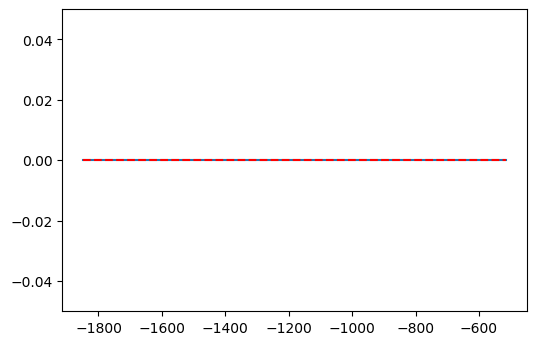

In [18]:
fig=plt.figure(dpi=100)
grad=(y[-1]-y[0])/(x[-1]-x[0])
b=y[0]-grad*x[0]
z=grad*x+b
plt.plot(x[10:99],y[10:99])
plt.plot(x[10:99],z[10:99],'r--')
plt.ylim([min(y[10:99]),max(y[10:99])])
plt.show()

In [25]:
order=2
m=cal.M_p[order]
L_s=cal.L_init[order]
ST=float(values[order+1][-1])
L_s=cal.L_init[order]
te.con.set_M_p(m,8e+6)
te.cal_ML_simple_B(ST,L_s,True,0.0,-1e+3)

(4.9999998538336, 0.011847424209150744, 312175502.2792291)

In [13]:
f=open('test_data.csv','w')
f.write('P,T,M,G,L\n')
for i in range(len(te.values)):
    f.write('{0},{1},{2},{3},{4}\n'.format(te.values[i][0],te.values[i][1],te.values[i][2],te.values[i][3],te.values[i][4]))
f.write('\n\ndP,dT,dM,dG,ddG,dL\n')
for i in range(len(te.dValues)):
    f.write('{0},{1},{2},{3},{4},{5}\n'.format(te.dValues[i][0],te.dValues[i][1],te.dValues[i][2],te.dValues[i][3],te.dValues[i][4],te.dValues[i][5]))
f.close()

In [15]:
for i in values:
    print(i[-2])

M_v=8.0e+06
-0.00024238443848700886
-5.6862371207222484e-05
2.4606326839955207e-05
9.430240593302774e-05
-6.276415322060969e-05
1.1531721548236479e-05
-8.271443394913813e-05
7.7374859584652e-05
-5.524156271499497e-05
-3.284927378783154e-05
5.448593043073935e-05
1.1315228568009594e-05
-6.402972904645532e-05
-1.8582431413641416e-05
7.035190176276664e-05
-1.8599357819043712e-05
-5.196096866974038e-05
8.043778231599068e-06
2.427966941979812e-05
-1.2054915546106434e-05
-3.271590425709412e-05
-2.277681508331157e-05
9.808854259740155e-05
-5.201773871472016e-05
2.7825915774824447e-05
7.289793468481017e-05
6.753507988326826e-05
-1.6295097209814138e-05
-8.384289027886526e-05
8.184147238381753e-05
1.432006812431886e-05
3.83393875152557e-05
-9.344729697417049e-05
9.953003750821313e-05
-7.860932532294685e-05
8.49520341956126e-05
-8.703723228808491e-05
6.980266805610294e-05
-6.250100557167286e-05
-7.892584676664864e-05
2.4366251971522047e-05
6.530660214105935e-05
5.3938793477751506e-05
-1.7489427110

In [5]:
ST

nan